In [3]:
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics, linear_model
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:


#sklearn has it's own 'Real World' datasets both of which are classification problems
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

from sklearn.datasets import fetch_covtype
cov = fetch_covtype()



clf = svm.SVC(kernel = 'linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv = 5)


In [5]:
def testGrid(dataset):
    #this function calculates the hyperparameters using Grid search and returns the accuracy for each iteration of k-Fold
    #the standard deviation and the time taken
    result = []
    n_samples = len(dataset.data)
    X = dataset.data.reshape((n_samples, -1))
    y = dataset.target
    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)

    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    scores = ['precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        
        clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
        start = time()
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print("In time = %0.3f" % (time() - start) )
        result = [means, stds, (time()-start)]
    return result

In [6]:
def testRandom(dataset):
    #this function calculates the hyperparameters using Random search and returns the accuracy for each iteration 
    #of k-Fold, the standard deviation and the time taken
    result = []
    n_samples = len(dataset.data)
    X = dataset.data.reshape((n_samples, -1))
    y = dataset.target

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)
    
    param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
    scores = ['precision', 'recall']
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        n_iter_search = 20
        clf = RandomizedSearchCV(RandomForestClassifier(n_estimators=20), param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5)
        start = time()
        clf.fit(X_train, y_train)
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print("In time = %0.3f" % (time() - start) )
        result = [means, stds, (time()-start)]
    return result


In [7]:
#GridScores = testGrid(cov)
GridScores = testGrid(faces)

# Tuning hyper-parameters for precision
()


/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/eoin/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:
()
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
Grid scores on development set:
()
0.027 (+/-0.046) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.027 (+/-0.046) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.792 (+/-0.119) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.027 (+/-0.046) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.829 (+/-0.120) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.807 (+/-0.126) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.829 (+/-0.120) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.837 (+/-0.139) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.837 (+/-0.139) for {'kernel': 'linear', 'C': 1}
0.837 (+/-0.139) for {'kernel': 'linear', 'C': 10}
0.837 (+/-0.139) for {'kernel': 'linear', 'C': 100}
0.837 (+/-0.139) for {'kernel': 'linear', 'C': 1000}
()
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.0

/home/eoin/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:
()
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
Grid scores on development set:
()
0.106 (+/-0.082) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.106 (+/-0.082) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.833 (+/-0.110) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.106 (+/-0.082) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.864 (+/-0.114) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.841 (+/-0.125) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.864 (+/-0.114) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.870 (+/-0.128) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.870 (+/-0.128) for {'kernel': 'linear', 'C': 1}
0.870 (+/-0.128) for {'kernel': 'linear', 'C': 10}
0.870 (+/-0.128) for {'kernel': 'linear', 'C': 100}
0.870 (+/-0.128) for {'kernel': 'linear', 'C': 1000}
()
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.0

In [8]:
#RandScores = testRandom(cov)
RandScores = testRandom(faces)

# Tuning hyper-parameters for precision
()


/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/eoin/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Grid scores on development set:
()
0.540 (+/-0.062) for {'max_features': 3, 'min_samples_split': 5, 'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3}
0.425 (+/-0.150) for {'max_features': 4, 'min_samples_split': 8, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}
0.715 (+/-0.152) for {'max_features': 7, 'min_samples_split': 8, 'bootstrap': False, 'criterion': 'gini', 'max_depth': None}
0.740 (+/-0.091) for {'max_features': 4, 'min_samples_split': 6, 'bootstrap': False, 'criterion': 'entropy', 'max_depth': None}
0.400 (+/-0.125) for {'max_features': 6, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3}
0.720 (+/-0.137) for {'max_features': 9, 'min_samples_split': 4, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': None}
0.705 (+/-0.157) for {'max_features': 6, 'min_samples_split': 3, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': None}
0.695 (+/-0.166) for {'max_features': 6, 'min_samples_split': 9, 'bootstrap': False, 'crit

/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


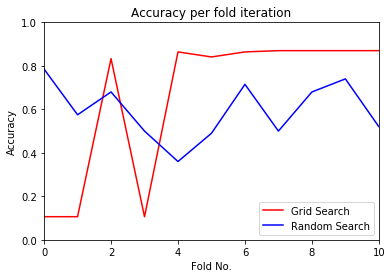

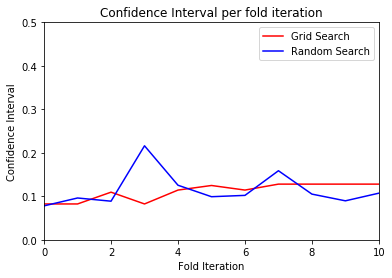

22.3695719242


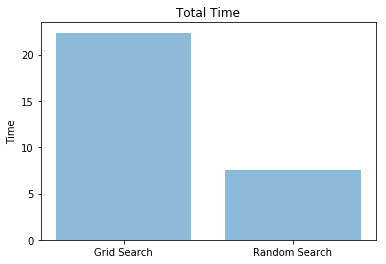

In [9]:
#This block makes three graphs, the accuracy per iteration, the confidence iterval (2*standard deviation) per iteration 
#and total time taken
plt.plot(GridScores[0], 'r', label='Grid Search')
plt.plot(RandScores[0], 'b', label = 'Random Search')
plt.ylabel('Accuracy')
plt.xlabel('Fold No.')
plt.axis([0, 10, 0, 1])
plt.title("Accuracy per fold iteration")
plt.legend();
plt.show()

gridConfidence = (GridScores[1]*2)
randConfidence = (RandScores[1]*2)
plt.plot(gridConfidence, 'r', label='Grid Search')
plt.plot(randConfidence, 'b', label = 'Random Search')
plt.ylabel('Confidence Interval')
plt.xlabel('Fold Iteration')
plt.title(" 95% Confidence Interval per fold iteration")
plt.axis([0, 10, 0, 0.5])
plt.legend()
plt.show()

performance = [GridScores[2], RandScores[2]]
objects = ('Grid Search', 'Random Search')
y_pos = np.arange(len(objects))
plt.bar(y_pos, performance, align = 'center', alpha=0.5)
plt.title("Total Time")
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.show()

In [ ]:
def testBayes(dataset):
    